# Adatok betöltése és szemrevételezése:

In [2]:
import os
import pandas as pd

# Get the current working directory
cwd = os.getcwd()
print("Current working directory:", cwd)
# Load the training and test data
pd_train = pd.read_excel(r'C:\basic_projects\AI_kurzus\beadando\01_regression_model\01_main\02_data\filtered_train_data.xlsx')
pd_test = pd.read_excel(r'02_data/Test.xlsx') 
print('Shape of train:\n')
print(pd_train.shape)
print('Shape of test:\n')
print(pd_test.shape)
print('\nHead of train:\n')
print(pd_train.head())
print('\nHead of test:\n')
print(pd_test.head())
print('\n')


Current working directory: c:\basic_projects\AI_kurzus\beadando\01_regression_model\01_main
Shape of train:

(8440, 6)
Shape of test:

(1000, 5)

Head of train:

   Unnamed: 0     AT      V       AP      RH      PE
0           0  10.54  34.03  1018.71   74.00  478.77
1           1   7.08  39.99  1010.55   91.44  482.83
2           2  14.49  41.16  1000.50   82.17  465.24
3           3  10.73  25.36  1009.35  100.15  469.43
4           4  22.88  63.91  1009.63   87.82  442.50

Head of test:

      AT      V       AP     RH      PE
0   9.59  38.56  1017.01  60.10  481.30
1  12.04  42.34  1019.72  94.67  465.36
2  13.87  45.08  1024.42  81.69  465.48
3  13.72  54.30  1017.89  79.08  467.05
4  15.14  49.64  1023.78  75.00  463.58




# Feature selection és adatok transzformálása:
- **Feature selection:** Előfordulhat hogy PE-t nem az összes válatozó függvényében szeretnénk illesztni. ('AT', 'AP', 'V', 'RH')
    így felkészítjük a kódot a feature selection-re

- **Standardization and Normalization:** Mivel az adatok más nagyságrendbe esnek és ez egyes regressziós modellek illesztésést elvhieti, így az adatokat tarnszformálva előállítjuk a stanardizált és a normlizált adatsort. 
    

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the training data
pd_train = pd.read_excel(r'C:\basic_projects\AI_kurzus\beadando\01_regression_model\01_main\02_data\filtered_train_data.xlsx')

# Load the test data
pd_test = pd.read_excel(r'02_data/Test.xlsx')  # Update this path

# Selecting the features and target for the training set
X_train = pd_train[['AT', 'AP', 'V', 'RH']]  # Features: Ambient Temperature, Pressure, Vacuum, Humidity
Y_train = pd_train['PE']  # Target: Power Output

# Selecting the features and target for the test set
X_test = pd_test[['AT', 'AP', 'V', 'RH']]  # Ensure the same features as the training set
Y_test = pd_test['PE']

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  

# Normalization
min_max_scaler = MinMaxScaler()
X_train_normalized = min_max_scaler.fit_transform(X_train)
X_test_normalized = min_max_scaler.transform(X_test) 



## Regressziós Modellek és Csoportosítások

### 1. Lineáris regressziós modellek:
- **LinearRegression**: Alap lineáris regressziós modell.
- **RidgeRegression**: L2 regularizációval ellátott Ridge regresszió.

### 2. Legközelebbi szomszéd alapú regressziós modellek:
- **KNeighborsRegressor (5 szomszéd)**: Az 5 legközelebbi szomszéd átlagát használja.
- **KNeighborsRegressor (10 szomszéd)**: Az 10 legközelebbi szomszéd átlagát használja.

### 3. Támogató Vektor Gép alapú regressziós modellek (SVR):
- **SVR (poly kernel)**: Polinomiális kernellel.
- **SVR (rbf kernel)**: Radiális bázisfüggvény (Gaussiánus) kernellel.

### 4. Fa-alapú regressziós modellek:
- **RandomForestRegressor**: Több döntési fa kombinációját használja.
- **DecisionTreeRegressor**: Egyetlen döntési fa modell.
- **BaggingRegressor**: SVR alapmodellként, több példány átlagolásával.

### 5. Neurális hálózat alapú regressziós modellek (MLPRegressor):
- **Multilayer Perceptron 100 RELU ADAM**: 100 rejtett neuronnal, RELU aktivációval, ADAM solverrel.
- **Multilayer Perceptron 100 RELU LBFGS**: 100 rejtett neuronnal, RELU aktivációval, LBFGS solverrel.
- **Multilayer Perceptron 100 IDENTITY ADAM**: 100 rejtett neuronnal, IDENTITY aktivációval, ADAM solverrel.
- **Multilayer Perceptron 100 LOGISTIC ADAM**: 100 rejtett neuronnal, LOGISTIC aktivációval, ADAM solverrel.
- **További MLPRegressor variánsok**: 50, 40, és 30 rejtett neuronnal, minden esetben RELU aktivációval és ADAM solverrel.



In [4]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingRegressor

# Creating the model groups
LR = LinearRegression()
RidgeRegression = Ridge(alpha=1.0)
models_functions= {
    'LinearRegression'  : LR,
    'RidgeRegression'   : RidgeRegression
}

#Nearest Neighbors regressions
n_neighbors = 5
knn_5 = KNeighborsRegressor(n_neighbors)
n_neighbors = 10
knn_10 = KNeighborsRegressor(n_neighbors)
models_nearest_neighbors = {
    '5 Neighbors Regressor'     : knn_5,
    '10 Neighbors Regressor'    : knn_10
}

#Epsilon-Support Vector Regressions
svr_poly_model = SVR(kernel='poly')
svr_rbf_model = SVR(kernel='rbf')
models_support_vector = {
    'support_vector_regression_rbf_model'   : svr_rbf_model,
    'support_vector_regression_poly_model'  : svr_poly_model
}

# Decision Tree Regressions
random_forest = RandomForestRegressor(n_estimators=100)
model_decision_tree_regressor = DecisionTreeRegressor(max_depth=5)
bagging_regressor = BaggingRegressor(estimator=SVR(), n_estimators=10, random_state=0)
models_tree_based_algorithms = {
    'RandomForest'                  : random_forest,
    'model_decision_tree_regressor' : model_decision_tree_regressor,
    'bagging_model'                 : bagging_regressor
}

#Neuaral network Regressions
MultilayerPerceptron_100_relu_adam      = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=10000)
MultilayerPerceptron_100_relu_lbfgs     = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='lbfgs', max_iter=10000)
MultilayerPerceptron_100_identity_adam  = MLPRegressor(hidden_layer_sizes=(100,), activation='identity', solver='adam', max_iter=10000)
MultilayerPerceptron_100_logistic_adam  = MLPRegressor(hidden_layer_sizes=(100,), activation='logistic', solver='adam', max_iter=10000)
models_neural_network_selection = {
    'Multilayer Perceptron Regressor\n hidden layer = 100, \n activation = RELU,\n solver = ADAM \n': MultilayerPerceptron_100_relu_adam,
    'Multilayer Perceptron \n hidden layer = 100,\n activation = RELU,\n solver = LBFGS \n': MultilayerPerceptron_100_relu_lbfgs,
    'Multilayer Perceptron \n hidden layer = 100,\n activation = IDENTITY,\n solver = ADAM \n': MultilayerPerceptron_100_identity_adam,
    'Multilayer Perceptron \n hidden layer = 100,\n activation = LOGISTIC,\n solver = ADAM \n': MultilayerPerceptron_100_logistic_adam   
}

MultilayerPerceptron_100_relu_adam  = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=10000)
MultilayerPerceptron_50_relu_adam   = MLPRegressor(hidden_layer_sizes=(50,), activation='relu', solver='adam', max_iter=10000)
MultilayerPerceptron_40_relu_adam   = MLPRegressor(hidden_layer_sizes=(40,), activation='relu', solver='adam', max_iter=10000)
MultilayerPerceptron_30_relu_adam   = MLPRegressor(hidden_layer_sizes=(30,), activation='relu', solver='adam', max_iter=10000)
models_neural_network_layers_100_50_40_30 = {
    'Multilayer Perceptron Regressor\n hidden layer = 100,\n activation = RELU,\n solver = ADAM \n': MultilayerPerceptron_100_relu_adam,
    'Multilayer Perceptron Regressor\n hidden layer = 50,\n activation = RELU,\n solver = ADAM \n': MultilayerPerceptron_50_relu_adam,
    'Multilayer Perceptron Regressor\n hidden layer = 40,\n activation = RELU,\n solver = ADAM \n': MultilayerPerceptron_40_relu_adam,
    'Multilayer Perceptron Regressor\n hidden layer = 30,\n activation = RELU,\n solver = ADAM \n': MultilayerPerceptron_30_relu_adam   
}

# Overall model gruop
model_groups = (models_functions,
                models_nearest_neighbors,
                models_support_vector,
                models_tree_based_algorithms,
                models_neural_network_selection,
                models_neural_network_layers_100_50_40_30)

# Results shpould be stored in the Result dict
results = {}

## Modellek pontozása: 
- Minden mindolet kvatitatív számok alapján szeretnénk lemérni és összeshaonlítani.
-  Ehhez **keresztvalidációt** fogunk alakalmazni: </br>
   * Ez egy technika, amely segít megállapítani, hogy a modell mennyire jól generalizál új adatokra. 
   * A **keresztvalidáció** során az adatokat több kisebb csoportra osztjuk, és minden egyes csoportra illesztjük a modellt, miközben a többi csoport adatát tesztelésre használjuk. 
   * Ezt többször megismételve a modell teljesítményének átlaga jobb képet adhat a modell valós teljesítményéről.
</br>

 A következő **model_fiting_prediction_evaluation(model, X_train_scaled, X_test_scaled, Y_train, Y_test)** függvény pontosan ezt csinálja. 

In [5]:
from sklearn.model_selection import cross_val_score, KFold
# Keresztvalidációs konfiguráció
kf = KFold(n_splits=5, shuffle=True, random_state=42)
kf

KFold(n_splits=5, random_state=42, shuffle=True)

## Erdemények ábrázolása: 
### PE mért vs PE perdictált: 
* Tegyük fel, hogy minden modelt sikerült illeszteni és ez után a képesek vagyunk jódolni (predikálni) adatokat (PE perdicált).

* Ideális esetben a PE mérési adatok függvényében ábrázolva a PE predikált adatokat egy olyan egyenest kapun aminke a meredksége 1 és eltolása 0. 

A következő **plot_actual_predicted(Y_test=None, Y_pred=None, model_name=None)**  függvény pontosan egy ilyen ábrát fog gyártani ( egyelőre csak egy példa adatsoron): 
* PE predikált és PE mért adatpontokat kirajzolja
* Elmélti egyenes berajzolása egy szaggatott vonallal 
* Továbbá egy egyenest is illeszt az adatpontokra és az ábráról leolvasható az illesztett egynes paraméteri

Equation of the fitted line: y = 0.95x + 0.17


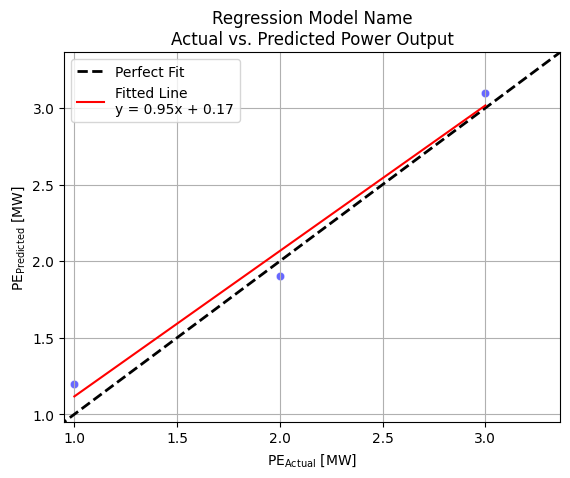

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_actual_predicted(Y_test=None, Y_pred=None, model_name=None):
    if Y_test is None or Y_pred is None or model_name is None:
        print('MISSING DATA!')
    else:
        data = pd.DataFrame({
            'Actual': Y_test,
            'Predicted': Y_pred
        })

        ax = sns.scatterplot(x='Actual', y='Predicted', data=data, color='blue', alpha=0.6)

        # Min/Max value for plotting the perfect fit line
        max_value = max(data['Actual'].max(), data['Predicted'].max())
        min_value = min(data['Actual'].min(), data['Predicted'].min())

        # Perfect fit line (where predicted equals actual)
        plt.plot([0, max_value*1.2], [0, max_value*1.2], 'k--', lw=2, label='Perfect Fit')  # Black dashed line

        # Calculate the trend line (linear fit) to represent the fitted line
        slope, intercept = np.polyfit(data['Actual'], data['Predicted'], 1)
        line = np.poly1d([slope, intercept])
        x_line = data['Actual']
        y_line = line(data['Actual'])
        line_label = f"Fitted Line \ny = {slope:.2f}x + {intercept:.2f}"
        plt.plot(x_line, y_line, "r-", label = line_label)  # Red solid line

        # Display the equation of the line
        print(f"Equation of the fitted line: y = {slope:.2f}x + {intercept:.2f}")

        ax.set(xlabel=r'PE$_{\text{Actual}}$ [MW]',  # Subscript for 'Actual'
               ylabel=r'PE$_{\text{Predicted}}$ [MW]',  # Subscript for 'Predicted'
               title=f'{model_name}\nActual vs. Predicted Power Output')

        ax.set_xlim(min_value*0.95, max_value*1.085)
        ax.set_ylim(min_value*0.95, max_value*1.085)
        plt.legend()
        plt.grid(True)
        plt.show()
        

# Example usage
Y_test_example = [1, 2, 3]
Y_pred_example = [1.2, 1.9, 3.1]
model_name_example = 'Regression Model Name'
plot_actual_predicted(Y_test_example, Y_pred_example, model_name_example)


### Regressziós modell illesztése és kiértékelése
Minden illesztendő regressziós modellel a következő 3 fő lépést fogjuk tenni: 
-  **1. Modell illesztés**:</br>
    A modellt a skálázott (vagy normlizált) tanító adatsorra illesztjük.
-  **2. Predikákáls**:</br>
    Az illesztett modell és a skálázott (vagy normalizált) teszt halmaz segítségével predikciót végzünk
-  **3. Kiértékelés/Pontozás**:</br>  
    A peredikált adatokat összevetjük a mérésekből származó adatokkal és keresztvalidációval valamint MSE és R2 értéket számolunk

A következő **regerssio_modeling(model, X_train_scaled, X_test_scaled, Y_train, Y_test)** függvény pontpsan ezt valósítja meg.

In [7]:
def regerssio_modeling(model, X_train_scaled, X_test_scaled, Y_train, Y_test): 
    # Model fiting
    model.fit(X_train_scaled, Y_train)
    # Makeing prediction
    Y_pred = model.predict(X_test_scaled)
    # Evaluating/Scoring the model
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = model.score(X_test_scaled, Y_test)
    cv_results = cross_val_score(model, X_test_scaled,Y_test, cv=kf, scoring='neg_mean_squared_error')
    return model, Y_pred, mse, r2, cv_results


Fitting and evaluating LinearRegression

Mean Squared Error: 18.603111749333046
R-squared Score: 0.9323494943464284
Cross-Validation Score: [-19.01945906 -19.72502018 -17.5259489  -15.94508649 -21.24767419]
Coefficients: [-14.61944324   0.40583434  -3.038816    -2.2932211 ]
Intercept: 454.3101327014219
LinearRegression CV MSE: 18.692637761215604
Equation of the fitted line: y = 0.94x + 28.01


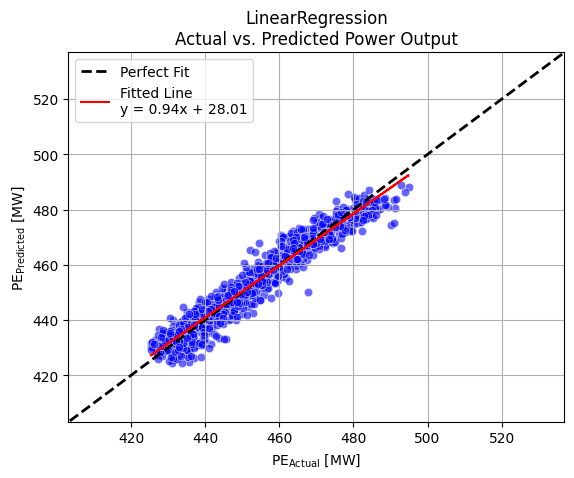


Fitting and evaluating RidgeRegression

Mean Squared Error: 18.603730462225617
R-squared Score: 0.932347244387357
Cross-Validation Score: [-19.02063737 -19.69331431 -17.58045356 -15.94147202 -21.22919153]
Coefficients: [-14.61022104   0.40781599  -3.044368    -2.2898856 ]
Intercept: 454.3101327014219
RidgeRegression CV MSE: 18.693013759501802
Equation of the fitted line: y = 0.94x + 28.05


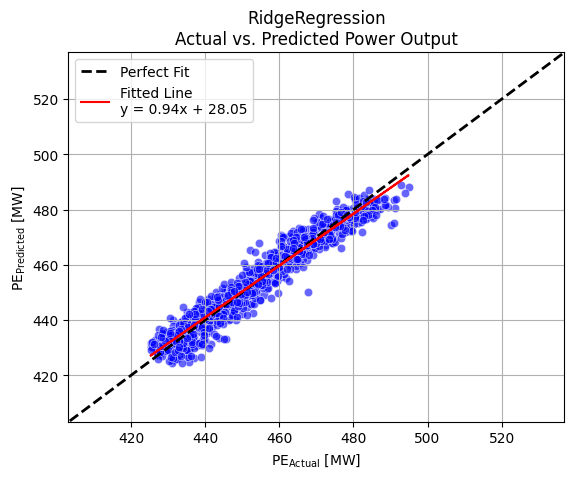


Fitting and evaluating 5 Neighbors Regressor

Mean Squared Error: 12.332689856000012
R-squared Score: 0.9551519812346994
Cross-Validation Score: [-21.47408094 -20.95952348 -23.33526926 -18.1782691  -18.9155605 ]
5 Neighbors Regressor CV MSE: 20.57254065599998
Equation of the fitted line: y = 0.96x + 19.61


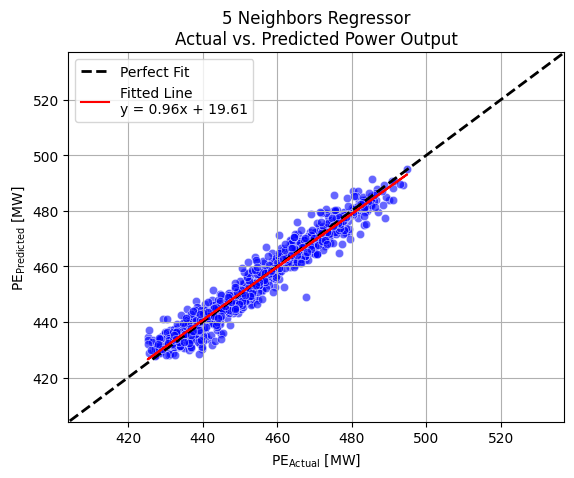


Fitting and evaluating 10 Neighbors Regressor

Mean Squared Error: 13.351378744000002
R-squared Score: 0.9514475032255649
Cross-Validation Score: [-21.07011865 -19.56511607 -22.02577911 -18.42140732 -19.29839368]
10 Neighbors Regressor CV MSE: 20.07616296599999
Equation of the fitted line: y = 0.95x + 23.26


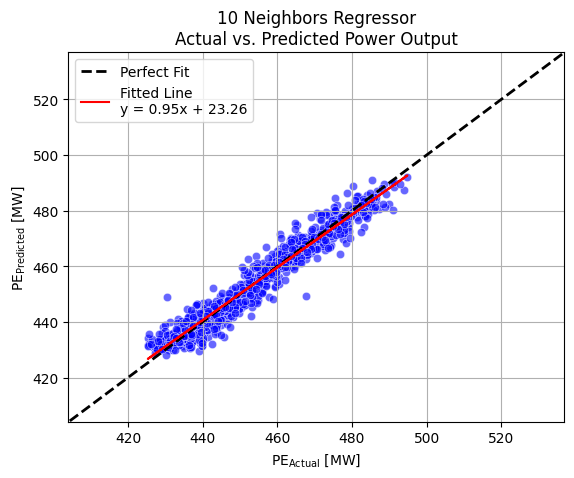


Fitting and evaluating support_vector_regression_rbf_model

Mean Squared Error: 16.07078447368031
R-squared Score: 0.9415583419299184
Cross-Validation Score: [-22.87593111 -21.44578086 -24.18987166 -21.29690242 -24.4896652 ]
Intercept: [456.19184652]
support_vector_regression_rbf_model CV MSE: 22.8596302476083
Equation of the fitted line: y = 0.95x + 23.59


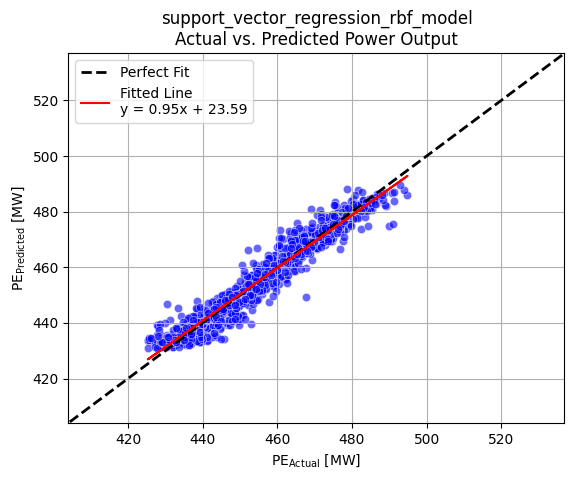


Fitting and evaluating support_vector_regression_poly_model

Mean Squared Error: 62.05129263323112
R-squared Score: 0.7743495077781101
Cross-Validation Score: [-59.25395678 -68.88379101 -57.13402909 -87.16894634 -60.54832707]
Intercept: [453.66861986]
support_vector_regression_poly_model CV MSE: 66.59781005654973
Equation of the fitted line: y = 0.87x + 59.91


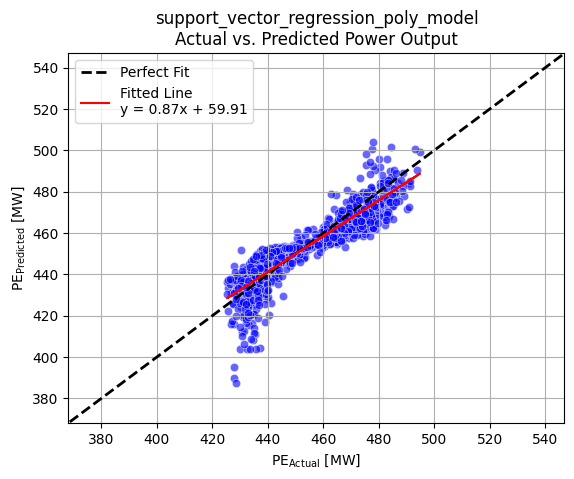


Fitting and evaluating RandomForest

Mean Squared Error: 9.256321513399982
R-squared Score: 0.966339242632567
Cross-Validation Score: [-14.20142373 -17.35606542 -16.48842586 -13.59291334 -18.25529844]
RandomForest CV MSE: 15.978825356560032
Equation of the fitted line: y = 0.96x + 18.27


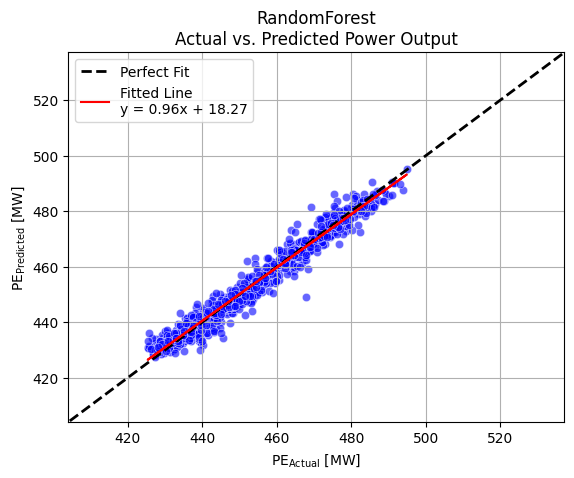


Fitting and evaluating model_decision_tree_regressor

Mean Squared Error: 17.750336791696203
R-squared Score: 0.9354506237633876
Cross-Validation Score: [-18.87810426 -21.98779765 -20.51899737 -17.00567339 -23.8926893 ]
model_decision_tree_regressor CV MSE: 20.456652392384928
Equation of the fitted line: y = 0.94x + 29.04


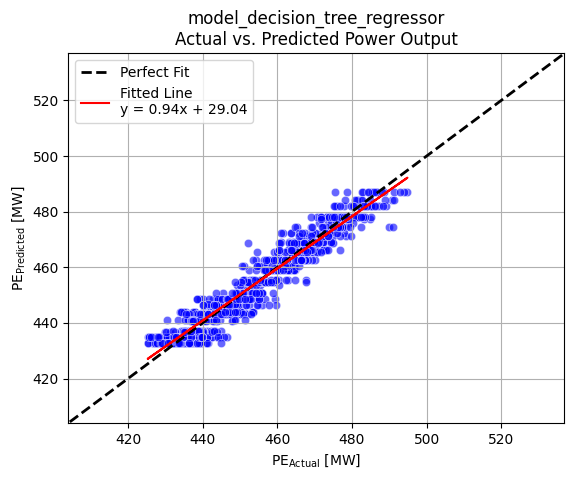


Fitting and evaluating bagging_model

Mean Squared Error: 16.02097055450524
R-squared Score: 0.9417394910229404
Cross-Validation Score: [-23.03655075 -21.93413165 -23.96717773 -21.08088032 -24.34146031]
bagging_model CV MSE: 22.872040151389392
Equation of the fitted line: y = 0.95x + 23.65


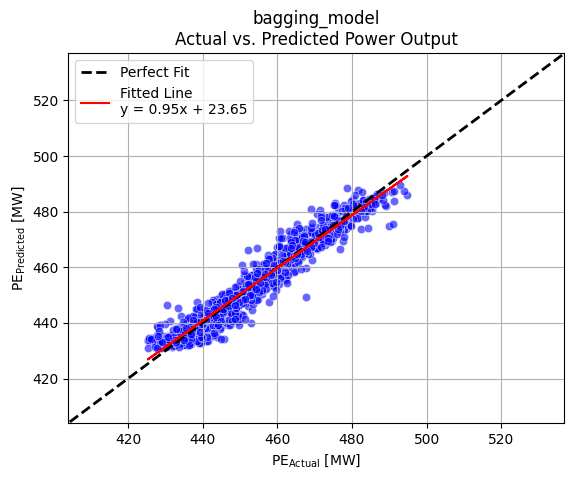


Fitting and evaluating Multilayer Perceptron Regressor
 hidden layer = 100, 
 activation = RELU,
 solver = ADAM 


Mean Squared Error: 15.487059082795398
R-squared Score: 0.9436810684064504
Cross-Validation Score: [-16.07582469 -16.96779571 -15.90458807 -16.2340791  -19.51896608]
Multilayer Perceptron Regressor
 hidden layer = 100, 
 activation = RELU,
 solver = ADAM 
 CV MSE: 16.940250730492863
Equation of the fitted line: y = 0.97x + 11.98


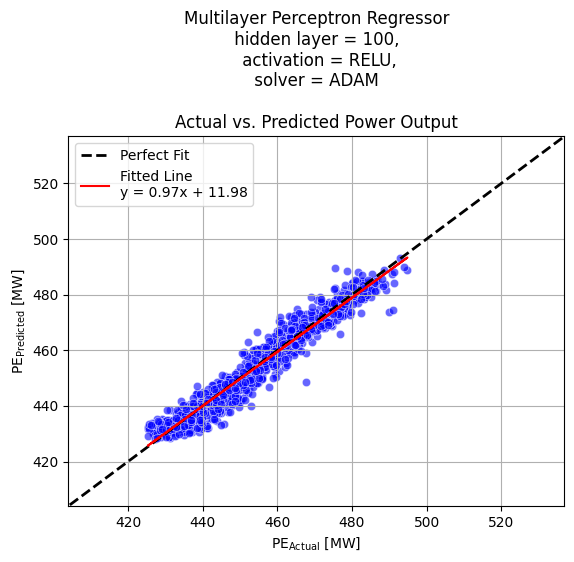


Fitting and evaluating Multilayer Perceptron 
 hidden layer = 100,
 activation = RELU,
 solver = LBFGS 


Mean Squared Error: 14.413970277489128
R-squared Score: 0.9475833725622462
Cross-Validation Score: [-18.20559087 -21.43542336 -17.02017962 -16.12798016 -20.96297025]
Multilayer Perceptron 
 hidden layer = 100,
 activation = RELU,
 solver = LBFGS 
 CV MSE: 18.750428851634318
Equation of the fitted line: y = 0.94x + 25.76


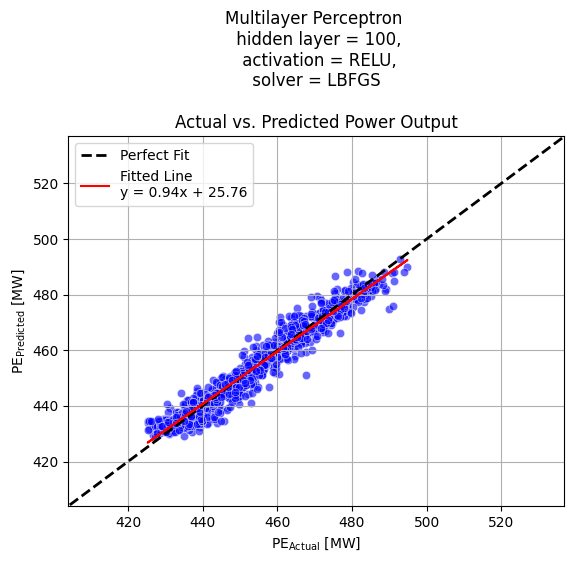


Fitting and evaluating Multilayer Perceptron 
 hidden layer = 100,
 activation = IDENTITY,
 solver = ADAM 


Mean Squared Error: 18.65109924113974
R-squared Score: 0.9321749870849814
Cross-Validation Score: [-18.99628599 -19.72999404 -17.56347857 -15.93450648 -21.24985512]
Multilayer Perceptron 
 hidden layer = 100,
 activation = IDENTITY,
 solver = ADAM 
 CV MSE: 18.694824039663565
Equation of the fitted line: y = 0.95x + 24.13


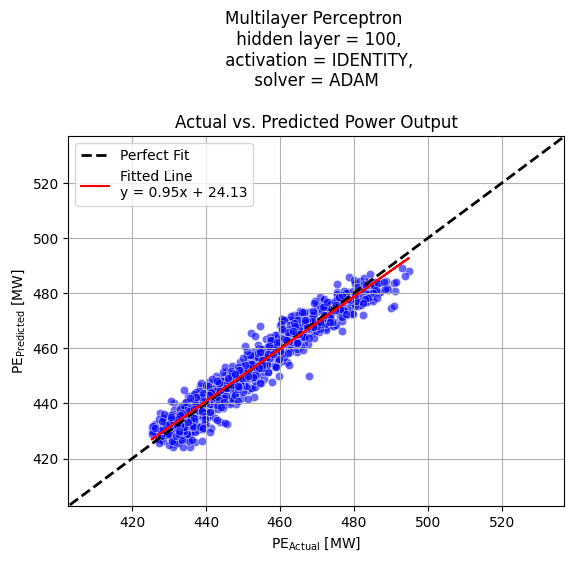


Fitting and evaluating Multilayer Perceptron 
 hidden layer = 100,
 activation = LOGISTIC,
 solver = ADAM 


Mean Squared Error: 15.76419361359231
R-squared Score: 0.9426732643683358
Cross-Validation Score: [-16.70538423 -17.90501532 -16.15743892 -14.7900404  -19.98247873]
Multilayer Perceptron 
 hidden layer = 100,
 activation = LOGISTIC,
 solver = ADAM 
 CV MSE: 17.108071518879974
Equation of the fitted line: y = 0.94x + 25.97


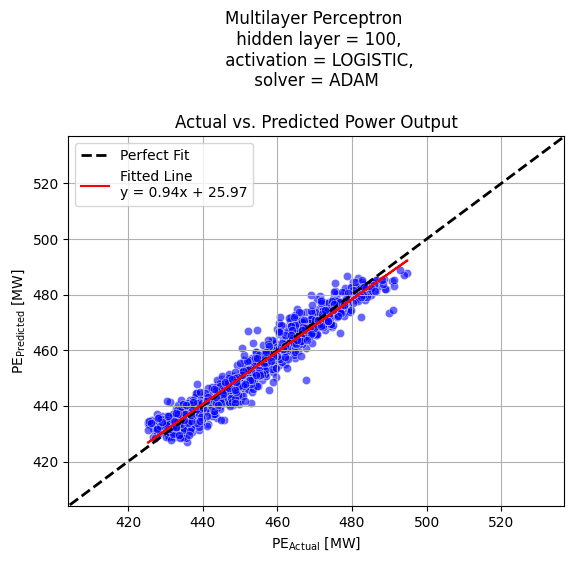


Fitting and evaluating Multilayer Perceptron Regressor
 hidden layer = 100,
 activation = RELU,
 solver = ADAM 


Mean Squared Error: 15.415731605541566
R-squared Score: 0.9439404518885385
Cross-Validation Score: [-15.89772536 -16.48796221 -15.99920822 -14.87123691 -18.74778946]
Multilayer Perceptron Regressor
 hidden layer = 100,
 activation = RELU,
 solver = ADAM 
 CV MSE: 16.400784432076087
Equation of the fitted line: y = 0.93x + 32.85


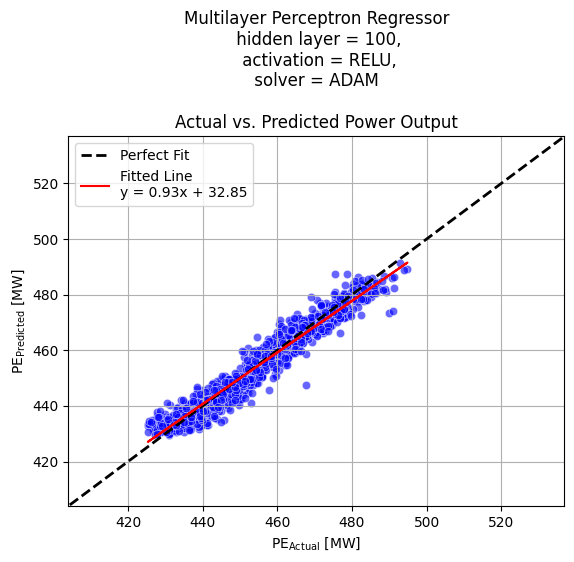


Fitting and evaluating Multilayer Perceptron Regressor
 hidden layer = 50,
 activation = RELU,
 solver = ADAM 


Mean Squared Error: 15.593216354107149
R-squared Score: 0.9432950258357337
Cross-Validation Score: [-16.61383061 -17.45049797 -16.27300193 -16.49216746 -19.01073109]
Multilayer Perceptron Regressor
 hidden layer = 50,
 activation = RELU,
 solver = ADAM 
 CV MSE: 17.16804581139558
Equation of the fitted line: y = 0.95x + 23.86


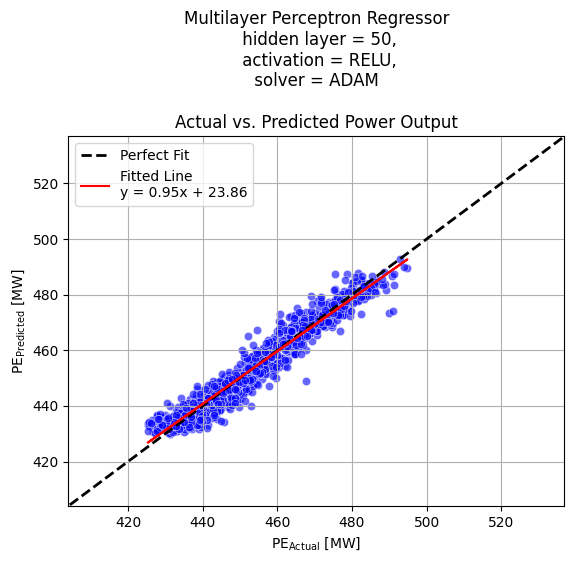


Fitting and evaluating Multilayer Perceptron Regressor
 hidden layer = 40,
 activation = RELU,
 solver = ADAM 


Mean Squared Error: 16.612101462296863
R-squared Score: 0.9395898342688228
Cross-Validation Score: [-16.18892506 -16.85431282 -16.60816699 -15.84873703 -20.81754178]
Multilayer Perceptron Regressor
 hidden layer = 40,
 activation = RELU,
 solver = ADAM 
 CV MSE: 17.263536735990222
Equation of the fitted line: y = 0.93x + 30.34


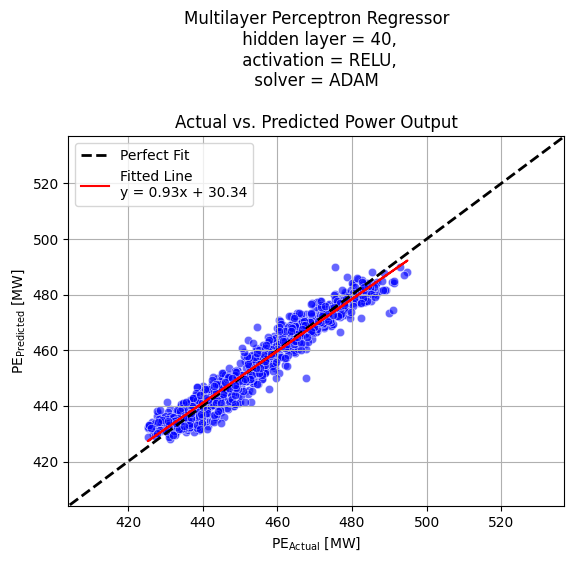


Fitting and evaluating Multilayer Perceptron Regressor
 hidden layer = 30,
 activation = RELU,
 solver = ADAM 


Mean Squared Error: 16.602735852200095
R-squared Score: 0.9396238924558261
Cross-Validation Score: [-18.25506552 -17.47612462 -16.29842072 -17.42774055 -19.60302174]
Multilayer Perceptron Regressor
 hidden layer = 30,
 activation = RELU,
 solver = ADAM 
 CV MSE: 17.812074628761334
Equation of the fitted line: y = 0.94x + 26.38


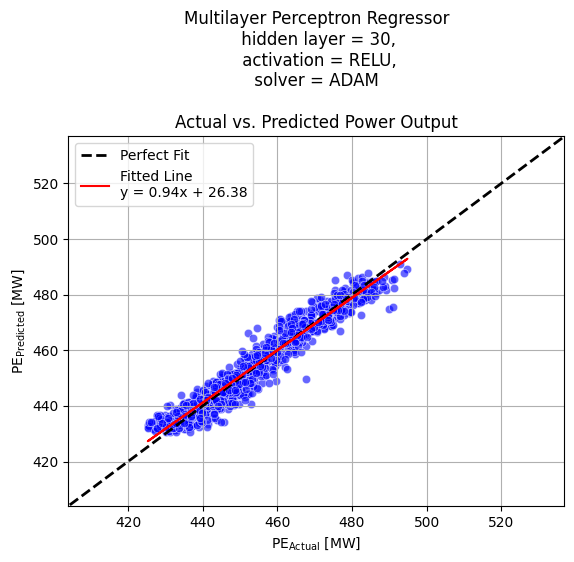

In [8]:
from colorama import Fore, Back, Style

# Fitting models and making predictions
for model_group in model_groups:
    for model_name, model in model_group.items():
        # Print Model Name
        print('\n' + 'Fitting and evaluating ' + Fore.YELLOW + f"{model_name}")
        print(Style.RESET_ALL)
        
        # Model fiting, makeing prediction, evaluating the model
        model, Y_pred, mse, r2, cv_results = regerssio_modeling(model, 
                                           X_train_scaled, 
                                           X_test_scaled, 
                                           Y_train, 
                                           Y_test)
        # Print MSE, R2 and  Coefficients, Intercept
        print(f"Mean Squared Error: {mse}\nR-squared Score: {r2}\nCross-Validation Score: {cv_results}")
        
        model_coef_exist = False
        if hasattr(model, 'coef_'):
            print(f"Coefficients: {model.coef_}")
            model_coef_exist = True 
        model_intercept_exist = False
        if hasattr(model, 'intercept_'):
            model_intercept_exist = True
            print(f"Intercept: {model.intercept_}")
        
        # Collect results
        results[model_name] = {
            "MSE"           : mse,
            "R2"            : r2,
            "cv_results"    : cv_results
        }

        print(f'{model_name} CV MSE: {-cv_results.mean()}')  # Negatív MSE átlagát pozitívvá tesszük
        # Plot PE_Actual vs PE_Predicted 
        plot_actual_predicted(Y_test, Y_pred,model_name)

### CV Score-ok további feldogozása és ábárázolása ( outdated!!!!)

In [9]:
pd_results = pd.DataFrame(results)
pd_results.head()
pd_results_MSE = pd_results.iloc[[0]]
pd_results_R2 = pd_results.iloc[[1]]
pd_results_CV = pd_results.iloc[[2]]
pd_results_MSE.head()
pd_results_R2.head()
pd_results_CV.head()


,LinearRegression,RidgeRegression,5 Neighbors Regressor,10 Neighbors Regressor,support_vector_regression_rbf_model,support_vector_regression_poly_model,RandomForest,model_decision_tree_regressor,bagging_model,"Multilayer Perceptron Regressor\n hidden layer = 100, \n activation = RELU,\n solver = ADAM \n","Multilayer Perceptron \n hidden layer = 100,\n activation = RELU,\n solver = LBFGS \n","Multilayer Perceptron \n hidden layer = 100,\n activation = IDENTITY,\n solver = ADAM \n","Multilayer Perceptron \n hidden layer = 100,\n activation = LOGISTIC,\n solver = ADAM \n","Multilayer Perceptron Regressor\n hidden layer = 100,\n activation = RELU,\n solver = ADAM \n","Multilayer Perceptron Regressor\n hidden layer = 50,\n activation = RELU,\n solver = ADAM \n","Multilayer Perceptron Regressor\n hidden layer = 40,\n activation = RELU,\n solver = ADAM \n","Multilayer Perceptron Regressor\n hidden layer = 30,\n activation = RELU,\n solver = ADAM \n"
cv_results,"[-19.01945905897743, -19.72502017958981, -17.5...","[-19.02063736872831, -19.693314314661226, -17....","[-21.47408093999999, -20.95952347999998, -23.3...","[-21.070118649999976, -19.56511607499998, -22....","[-22.875931107250278, -21.44578085543005, -24....","[-59.25395677884242, -68.88379100856271, -57.1...","[-14.20142372664996, -17.356065422449834, -16....","[-18.8781042626261, -21.98779764673379, -20.51...","[-23.03655075409604, -21.934131650434555, -23....","[-16.075824688033507, -16.96779571100291, -15....","[-18.205590868272743, -21.435423360477422, -17...","[-18.99628599434318, -19.72999403679306, -17.5...","[-16.705384225243535, -17.905015316817348, -16...","[-15.897725357465278, -16.48796221197933, -15....","[-16.613830610040687, -17.45049796564271, -16....","[-16.188925061076258, -16.854312822448975, -16...","[-18.2550655219901, -17.476124618753268, -16.2..."


In [10]:
# Feltételezzük, hogy a df_long a már korábban transzformált DataFrame
df_long = pd_results_MSE.melt(var_name='Model', value_name='MSE')


# Plotting with seaborn
plt.figure(figsize=(12, 8))  # Set the figure size
bar_plot = sns.barplot(x='Model', y='MSE', data=df_long, palette=map(df_long['MSE']/df_long['MSE'].max()))
plt.xticks(rotation=90)  # Forgatjuk a címkéket, hogy jobban láthatók legyenek
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('Model')
plt.title('MSE of Various Regression Models with Gradient Color')
plt.grid(True, linestyle='--', alpha=0.6)  # Adding a grid for better readability
plt.show()

TypeError: map() must have at least two arguments.

<Figure size 1200x800 with 0 Axes>

In [6]:
data = {
    'Model': ['LinearRegression', 'RidgeRegression', '5 Neighbors Regressor', '10 Neighbors Regressor',
              'Support Vector Regression RBF', 'Support Vector Regression Poly', 'RandomForest',
              'Decision Tree Regressor', 'Bagging Model', 'MLP Regressor'],
    'MSE': [18.603112, 18.60373, 12.33269, 13.351379, 16.070784, 62.051293, 9.1748,
            17.750337, 16.020971, 15.232285]
}


df_long = pd.DataFrame(data)
df_long.head()

trans = pd_results_MSE.T
trans.head()


NameError: name 'pd_results_MSE' is not defined

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Assuming df is your DataFrame after reset_index()
# Ensure MSE is numeric
trans['MSE'] = pd.to_numeric(trans['MSE'], errors='coerce')  # Coerce errors will set non-convertible values to NaN

# Drop any rows where MSE could not be converted to numeric
df = trans.dropna(subset=['MSE'])

# Normalize MSE for color mapping
norm = plt.Normalize(df['MSE'].min(), df['MSE'].max())
colors = plt.cm.viridis(norm(df['MSE'].values))

# Convert colors to hex format for seaborn
df['colors'] = [mcolors.rgb2hex(color) for color in colors]

# Plotting with seaborn
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Model', y='MSE', data=df, palette=df['colors'].tolist())
plt.xticks(rotation=90)  # Rotate model names for better readability
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE of Various Regression Models')
plt.show()

NameError: name 'trans' is not defined

In [20]:
def plot_MSE(pd_results_MSE):
    # Plotting with seaborn
    plt.figure(figsize=(10, 8))  # Set the figure size
    sns.barplot(y='Model', x='MSE', data=df, palette='coolwarm')  # Create a bar plot with seaborn
    plt.xlabel('Mean Squared Error (MSE)')
    plt.ylabel('Model')
    plt.title('MSE of Various Regression Models')
    plt.grid(True, linestyle='--', alpha=0.6)  # Adding a grid for better readability
    plt.show()
plot_MSE(pd_results_MSE)

NameError: name 'df' is not defined

<Figure size 1000x800 with 0 Axes>

In [32]:
pd_results
# Creating an empty dictionary to store the results
new_rows_data = {}
# Iterate over each column in the DataFrame
for col in pd_results.columns:
    # Query the last element from the given column
    last_element = pd_results.iloc[-1][col]
    print(f'Column: {col}, Last element: {last_element}')
    # Check if the last element is a list
    if isinstance(last_element, np.ndarray):
        # If it's a list, add it to the dictionary
        new_rows_data[col] = last_element
        print(f'  Added: {col} -> {last_element}')
    else:
        print('  Not a list, skipped')
print('\nFinal dictionary:', new_rows_data)



Column: LinearRegression, Last element: [-19.01945906 -19.72502018 -17.5259489  -15.94508649 -21.24767419]
  Added: LinearRegression -> [-19.01945906 -19.72502018 -17.5259489  -15.94508649 -21.24767419]
Column: RidgeRegression, Last element: [-19.02063737 -19.69331431 -17.58045356 -15.94147202 -21.22919153]
  Added: RidgeRegression -> [-19.02063737 -19.69331431 -17.58045356 -15.94147202 -21.22919153]
Column: 5 Neighbors Regressor, Last element: [-21.47408094 -20.95952348 -23.33526926 -18.1782691  -18.9155605 ]
  Added: 5 Neighbors Regressor -> [-21.47408094 -20.95952348 -23.33526926 -18.1782691  -18.9155605 ]
Column: 10 Neighbors Regressor, Last element: [-21.07011865 -19.56511607 -22.02577911 -18.42140732 -19.29839368]
  Added: 10 Neighbors Regressor -> [-21.07011865 -19.56511607 -22.02577911 -18.42140732 -19.29839368]
Column: support_vector_regression_rbf_model, Last element: [-22.87593111 -21.44578086 -24.18987166 -21.29690242 -24.4896652 ]
  Added: support_vector_regression_rbf_mod

In [11]:
pd_new_rows = pd.DataFrame(new_rows_data)
cv_index_labels = ['cv' + str(i+1) for i in range(len(pd_new_rows))]
pd_new_rows.index = cv_index_labels
pd_result_table =  pd.concat([pd_results,pd_new_rows],ignore_index=False)
pd_result_table = pd_result_table.drop('cv_results')

print('The finle table of scores in each fitted model:')
pd_result_table.to_excel('final_results.xlsx')

pd_result_table.head()


NameError: name 'new_rows_data' is not defined

In [12]:
pd_cv_res = pd_result_table.loc[cv_index_labels]
pd_cv_res
# Assuming 'df' is your DataFrame name
df_transposed_pd_cv_res = pd_cv_res.transpose()
df_transposed_pd_cv_res

NameError: name 'pd_result_table' is not defined

In [45]:
cv_melted_df = pd.melt(pd_cv_res.reset_index(), id_vars=['index'], var_name='Model', value_name='CV_Score')
cv_melted_df.head()

mse_r2_melted_df = pd.melt(pd_results_MSE_R2.reset_index(), id_vars=['index'], var_name='Model', value_name='MSE and R2')
mse_r2_melted_df.head()

NameError: name 'pd_results_MSE_R2' is not defined

In [346]:

df = pd_cv_res
df = df.reset_index().melt(id_vars=['index'], var_name='Model', value_name='CV_Score')
df.head()

df_gr1= df.loc[0:19]
df_gr2= df.loc[20:39]
df_gr3= df.loc[40:59]
df_gr4= df.loc[60:100]





In [337]:
df.head()

,index,Model,CV_Score
0,cv1,LinearRegression,-19.019459
1,cv2,LinearRegression,-19.72502
2,cv3,LinearRegression,-17.525949
3,cv4,LinearRegression,-15.945086
4,cv5,LinearRegression,-21.247674


In [42]:
def cross_val_scor_by_model(df):
    # A Seaborn catplot használata, amely lehetővé teszi az adatok "facet"-szerű ábrázolását.
    g = sns.catplot(
    x='index', y='MSE and R2', hue='Model', data=df, 
    kind='bar', palette='bright', aspect=2,
    height=5, legend_out=True
    )
    # Az X tengely címkéit 45 fokban elforgatjuk
    plt.xticks(rotation=45)

    # A modellnevek egyértelműsítése
    g.set_axis_labels("CV Round", "CV Score")
    g._legend.set_title("Model")

    # Az ábra címének beállítása
    plt.title('Cross-Validation Scores by Model')

    # Megjelenítés
    plt.show()

In [47]:
cross_val_scor_by_model(df_transposed_pd_cv_res)

ValueError: Could not interpret value `index` for `x`. An entry with this name does not appear in `data`.

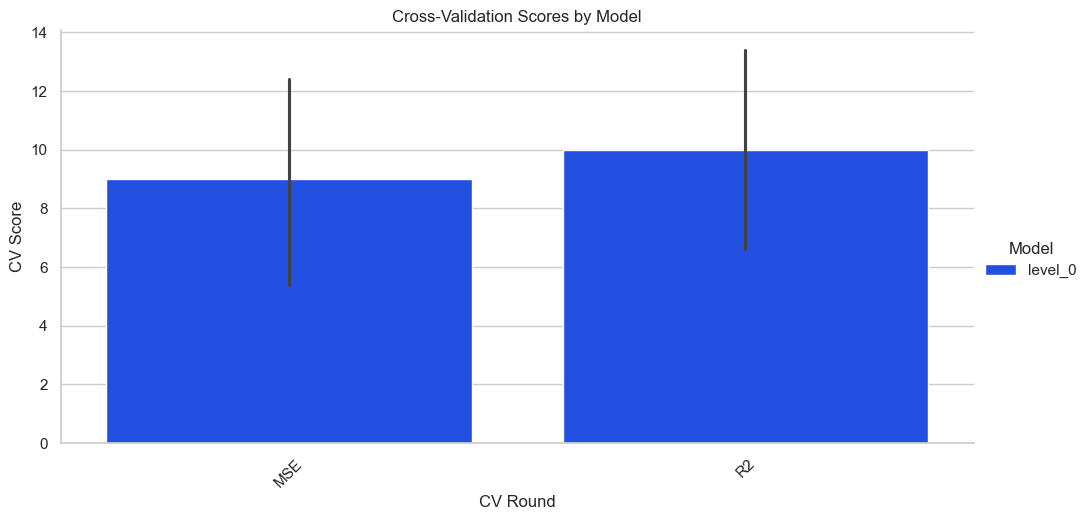

ValueError: Unable to parse string "LinearRegression" at position 14

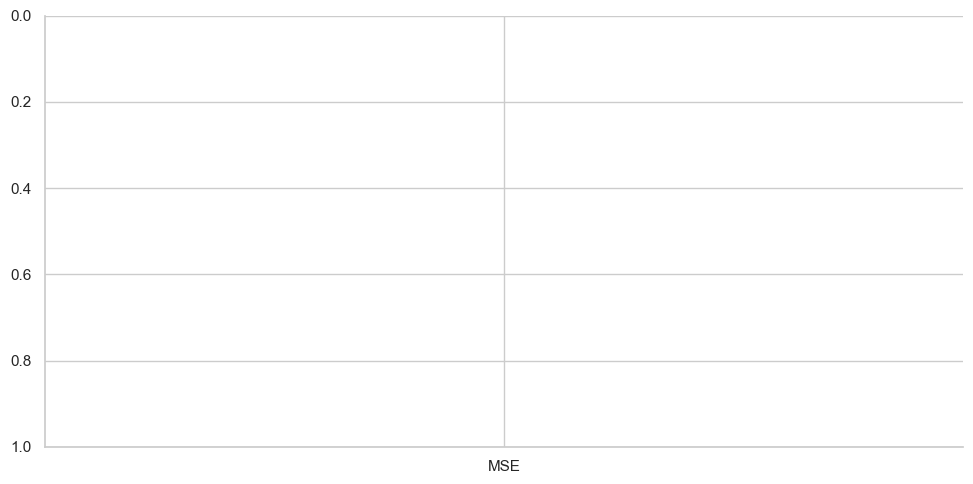

In [ ]:
for df in [df_gr1,df_gr2,df_gr3,df_gr4]:
    cross_val_scor_by_model(df)



### Illesztési probléma a Multilayer Perceptron esetén! 


Equation of the fitted line: y = 0.94x + 27.19


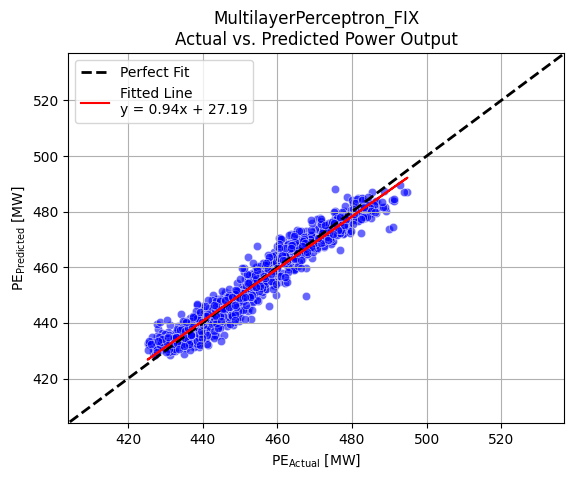

In [33]:
MultilayerPerceptron_FIX  = MLPRegressor(hidden_layer_sizes=(50,), 
                                         activation='relu', 
                                         solver='adam',
                                         max_iter=10000)

model_MLP, Y_pred, mse, r2, cv_results = regerssio_modeling(MultilayerPerceptron_FIX, X_train_scaled, X_test_scaled, Y_train, Y_test)

model_name = 'MultilayerPerceptron_FIX'
plot_actual_predicted(Y_test, Y_pred,model_name)

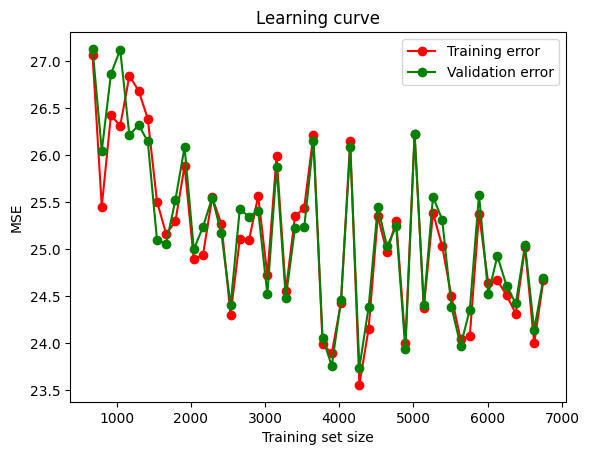

In [34]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(
    model_MLP, X_train, Y_train, train_sizes=np.linspace(0.1, 1.0, 50),
    cv=5, scoring='neg_mean_squared_error')

train_scores_mean = -train_scores.mean(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training error")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Validation error")
plt.title('Learning curve')
plt.xlabel('Training set size')
plt.ylabel('MSE')
plt.legend(loc="best")
plt.show()


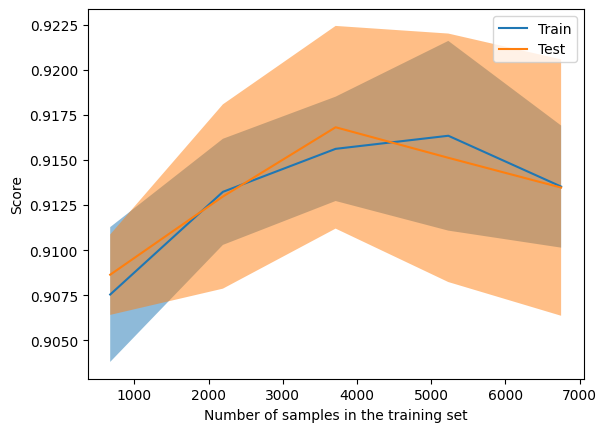

In [35]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import LearningCurveDisplay, learning_curve
from sklearn.tree import DecisionTreeClassifier
X, y = load_iris(return_X_y=True)
#tree = DecisionTreeClassifier(random_state=0)
train_sizes, train_scores, test_scores = learning_curve(model_MLP, X_train, Y_train,)
display = LearningCurveDisplay(train_sizes=train_sizes,
train_scores=train_scores, test_scores=test_scores, score_name="Score")
display.plot()
plt.show()

In [36]:
model_MLP

MLPRegressor(hidden_layer_sizes=(50,), max_iter=10000)